In [25]:
# Import Library
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np

In [26]:
# Parameter-paramater yang digunakan
kecepatan_pembelajaran = 0.01
langkah_pelatihan = 5000
tampilkan_langkah = 50

In [27]:
# Data latih yang digunakan
X = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
Y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

In [28]:
# Bobot dan Bias, diinisialisasi secara acak
rng = np.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Regresi linier (Wx + b)
def Regresi_Linier(x):
    return W * x + b

# Mean square error (MSE)
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Pengoptimalan Penurunan Gradien Stochastic
optimizer = tf.optimizers.SGD(kecepatan_pembelajaran)

In [29]:
# Fungsi untuk proses pengoptimalan

from math import sqrt
def run_optimization():
    # Bungkus komputasi di dalam GradientTape untuk
    # diferensiasi otomatis.
    with tf.GradientTape() as g:
        pred = Regresi_Linier(X)
        mse = mean_square(pred, Y)
        rmse = sqrt(mse)
        MAPE = mean_absolute_percentage_error(Y, pred)
        Persentase_keberhasilan = 100 - MAPE
    
    # Hitung gradien
    gradients = g.gradient(mse, [W, b])
    
    # Perbarui W dan b menggunakan gradien berikut.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [30]:
# Jalankan pelatihan untuk sejumlah langkah tertentu:
for langkah in range(1, langkah_pelatihan + 1):
    # Jalankan pengoptimalan untuk meperbarui nilai W dan b.
    run_optimization()
    
    if langkah % tampilkan_langkah == 0:
        pred = Regresi_Linier(X)
        mse = mean_square(pred, Y)
        rmse = sqrt(mse)
        MAPE = mean_absolute_percentage_error(Y, pred)
        Persentase_keberhasilan = 100 - MAPE
        
        print("langkah: %i, mse: %f, rmse: %f, MAPE: %f, Persentase_keberhasilan: %f, W: %f, b: %f" % (langkah, mse, rmse, MAPE, Persentase_keberhasilan, W.numpy(), b.numpy()))

langkah: 50, mse: 0.162761, rmse: 0.403437, MAPE: 13.339012, Persentase_keberhasilan: 86.660988, W: 0.289463, b: 0.530621
langkah: 100, mse: 0.160840, rmse: 0.401049, MAPE: 13.279112, Persentase_keberhasilan: 86.720888, W: 0.285134, b: 0.561310
langkah: 150, mse: 0.159333, rmse: 0.399166, MAPE: 13.226066, Persentase_keberhasilan: 86.773934, W: 0.281300, b: 0.588488
langkah: 200, mse: 0.158152, rmse: 0.397683, MAPE: 13.179092, Persentase_keberhasilan: 86.820908, W: 0.277905, b: 0.612555
langkah: 250, mse: 0.157225, rmse: 0.396517, MAPE: 13.220113, Persentase_keberhasilan: 86.779887, W: 0.274899, b: 0.633868
langkah: 300, mse: 0.156499, rmse: 0.395599, MAPE: 13.309546, Persentase_keberhasilan: 86.690454, W: 0.272237, b: 0.652743
langkah: 350, mse: 0.155929, rmse: 0.394878, MAPE: 13.388743, Persentase_keberhasilan: 86.611257, W: 0.269879, b: 0.669457
langkah: 400, mse: 0.155482, rmse: 0.394312, MAPE: 13.458881, Persentase_keberhasilan: 86.541119, W: 0.267791, b: 0.684259
langkah: 450, mse

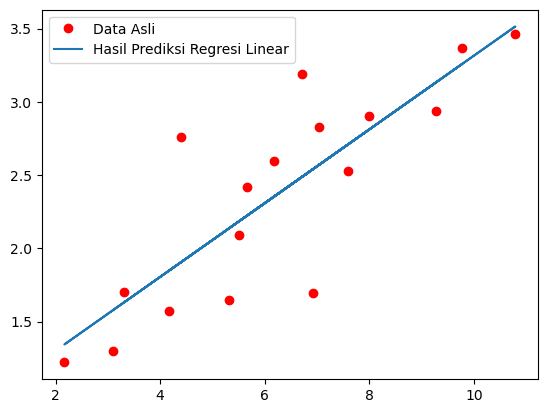

In [32]:
# Tampilan grafis

import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Data Asli')
plt.plot(X, np.array(W * X + b), label='Hasil Prediksi Regresi Linear')
plt.legend()
plt.show()